# 문서 유사도 측정 지표

문서 유사도도 군집도와 유사하다. 근데 가장 큰 차이는

군집도는 비슷한, 유사한 문서들을 하나의 그룹핑을한거고

문사의 유사도를 알고 싶으면 A 문서가 B 문서와 얼마나 유사한지 그 지표를 알고 싶은 것임.

크게 나눠서 코사인 유사도(Cosine Similarity)냐 자카드 유사도냐(Jaccard Similaraity)를 따지는데 일반적으로 코사인 유사도만 가지고서도 충실하게 따질 수 있다.



![](./img/Docsimilarity1.png)

## 코사인 유사도<br>

A 벡터와 B벡터의 사이 '각'의 코사인 값을 구하는 것이다. (각!)

두번째 그림에서 각이 90도면 관련성이 없다는걸 알 수 있다. 

세번째는 아예 반대다. 코사인이 180도가 된다.

코사인 0 = 1

코사인 90 = 0

코사인 180 = -1

A와 B 벡터가 동일한 방향성

단어들을 피처 벡터 행렬화 한다고 해보자

D0의 문서의 벡터는 [3,4,3,0,1]
D1의 문서의 벡터는 [2,3,2,4,5]

D0과 D1의 문서를 비교한다면 위의 벡터끼리 비교하는 것 임



![](./img/cos_similarity1.png)

## 코사인 유사도

코사인 유사도 식은 다음과 같다.

A벡터와 B 벡터의 내적은 A벡터 크기 B 벡터 크기 곱하기 코사인 사잇각이다.(중학교 때 배웠다)

코사인 사잇각은 similarity. 이 값은 어떻게 계산되느냐, A 벡터와 B 벡터의 내적을 A 벡터와 B 벡터의 크기로 나눈 것이다.(즉, 정규화 시킨 것)

A 벡터와 B 벡터가 아무리 커도 크기에 따라서 다시 나눠지기 때문에 0에서 1사이로 정규화가 되는 것이다. 

크기보다는 벡터 방향성 비교에 중점을 둔다. 

예를 들어서 

D0, D1, D2의 문서가 있는데 단어가 3개밖에 없다고 해보자.

D0에서 머신러닝이 50번, 1에서 45번, 2에서 10번 나왔다고 하자.

그렇다면 D0과 D1은 유사도가 굉장히 높을거라 생각할 수 있지만, 이럴 수 있다.

A문서는 1,000글자가 있고 B 문서는 10,000글자가 있을 수 있다. 이런 단순한 숫자는 의미가 없다.

거기다가 D1 문서를 봤더니 머신러닝 알고리즘에 대해 설명한게 아니라 책팝니다 였다.

그래서 이 크기보다는 **'방향성'** 에 중점을 맞춰서 지표가 설정이 되는 것이다.

![](./img/Docsimilarity2.png)

## 사이킷런 cosine_similarity()

사이킷런에 이러한 코사인 유사도를 쉽게 구해줄 수 있는 유틸리티가 있다. cosine_similarity를 하면 굉장히 쉽게 찾아냄.

sklearn.metrics.pairwise 에서 pirwise는 쌍으로 가지고 있다는 뜻임. 이건 이따가 다시 설명.

cosine_similarity 함수가 있는데 이건 기준문서 (X)에 대해서 다른 문서 (Y)는 얼마나 비슷한가요? 라는 뜻.

행렬 대 행렬로 나타낼 수 있음.

여러개의 문서들을 피쳐벡터화를 하면 피쳐 벡터 행렬이 생긴다.(왼쪽 아래 그림)

cosine_similarity(X,X)를 넣으면 어떻게 될까? 

D0과 D0을 비교하면 1(똑같으므로) D1을 비교 0.4 D2를 비교 0.7 이 나온다.

D1을 D0과 비교 0.4 D1을 비교하면 1(똑같으므로)...

이렇게 비교함.

이렇게 pairwise(쌍) 형태로 문서와 문서끼리의 코사인 유사도를 행렬로 반환 함.

![](./img/cosine_similarity1.png)

### 문서 유사도 측정 방법 – 코사인 유사도

**코사인 유사도 반환 함수 생성**

이름에서 유추할 수 있듯이, 두개의 벡터가 들어오면 이 벡터의 코사인 시밀러리티 값을 반환을 하는 것임.

In [1]:
import numpy as np

def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm     
    
    return similarity


**TF-IDF 벡터화 후 코사인 유사도 비교**

3개의 문서라고 가정해서 보자

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


In [3]:
print(type(feature_vect_simple))

<class 'scipy.sparse.csr.csr_matrix'>


todense()를 왜 하냐면, csr_matrix이기 떄문에 하는 것임. 일반 dense한 메트릭스 형태로 바꾸기 위해서.

In [4]:
# TFidfVectorizer로 transform()한 결과는 Sparse Matrix이므로 Dense Matrix로 변환. 
feature_vect_dense = feature_vect_simple.todense()

#첫번째 문장과 두번째 문장의 feature vector  추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

#첫번째 문장과 두번째 문장의 feature vector로 두개 문장의 Cosine 유사도 추출
similarity_simple = cos_similarity(vect1, vect2 )
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))


문장 1, 문장 2 Cosine 유사도: 0.402


In [5]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect1, vect3 )
print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect2, vect3 )
print('문장 2, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도: 0.404
문장 2, 문장 3 Cosine 유사도: 0.456


**사이킷런의 cosine_similarity()함수를 이용하여 비교**

In [6]:
from sklearn.metrics.pairwise import cosine_similarity

# 첫번재 문장과 전체 문장
similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple)
print(similarity_simple_pair)


[[1.         0.40207758 0.40425045]]


위의 껀 2차원 행렬로 반환 됨.

이거를 빼고 싶다, 인덱스를 아래처럼 [1:]

In [7]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


In [8]:
similarity_simple_pair = cosine_similarity(feature_vect_simple , feature_vect_simple)
print(similarity_simple_pair)
print('shape:',similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


cos_similarity는 쓰임새가 굉장히 많다. 뒤에 희소행렬(추천 등)의 유사도를 비교할 때(이 상품을 선택한 유저와 다른 상품을 선택한 유저 등) 많이 쓰인다

### Opinion Review 데이터 셋을 이용한 문서 유사도 측정

코드 자체는 군집화 코드와 똑같다. 익숙치 않다면 다시 보고 오기

In [9]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [10]:
import pandas as pd
import glob ,os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = r'C:\Users\esaw2\WorkSpace\Study\PerfectGuide\data\OpinosisDataset1.0\topics'
all_files = glob.glob(os.path.join(path, "*.data"))     
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

    
    
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , \
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )


feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

C:\Users\esaw2\Anaconda3\envs\pygta5\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


**호텔로 클러스터링 된 문서중에서 비슷한 문서를 추출**

In [11]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=1인 데이터는 호텔로 클러스터링된 데이터임. DataFrame에서 해당 Index를 추출
hotel_indexes = document_df[document_df['cluster_label']==1].index
print('호텔로 클러스터링 된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 클러스터링된 데이터 중 첫번째 문서를 추출하여 파일명 표시.  (이걸 기준 문서로 삼는다는 말임)
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명 ',comparison_docname,' 와 타 문서 유사도######')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력하여 호텔 클러스터링된 feature_vect 추출 
이를 이용하여 호텔로 클러스터링된 문서 중 첫번째 문서와 다른 문서간의 코사인 유사도 측정.'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]] , feature_vect[hotel_indexes])
print(similarity_pair)


호텔로 클러스터링 된 문서들의 DataFrame Index: Int64Index([1, 13, 14, 15, 20, 21, 24, 28, 30, 31, 32, 38, 39, 40, 45, 46], dtype='int64')
##### 비교 기준 문서명  bathroom_bestwestern_hotel_sfo  와 타 문서 유사도######
[[1.         0.0430688  0.05221059 0.06189595 0.05846178 0.06193118
  0.03638665 0.11742762 0.38038865 0.32619948 0.51442299 0.11282857
  0.13989623 0.1386783  0.09518068 0.07049362]]


[[10  8  9 12 13  7 11 14 15  5  3  4  2  1  6]]
Int64Index([1, 13, 14, 15, 20, 21, 24, 28, 30, 31, 32, 38, 39, 40, 45, 46], dtype='int64')


Text(0.5, 1.0, 'bathroom_bestwestern_hotel_sfo')

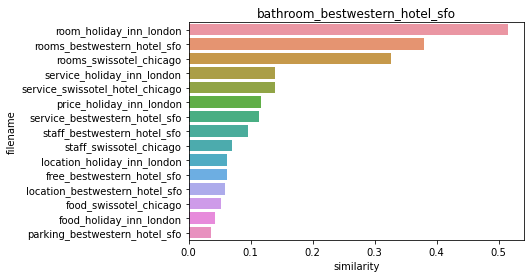

In [12]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# argsort()를 이용하여 앞예제의 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 반환하되 자기 자신은 제외. 
sorted_index = similarity_pair.argsort()[:,::-1] # argsort() 는 어떨때 쓴다? 넘파이에서 메타값, 컬럼명을 찾아준다.
sorted_index = sorted_index[:, 1:]
print(sorted_index)

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재 정렬. 
print(hotel_indexes)
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1,)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1,))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 Index와 유사도값을 이용하여 파일명과 유사도값을 Seaborn 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename',data=hotel_1_sim_df)
plt.title(comparison_docname)

결국 하려는것. 임의의 문서를 찾고 그 문서와 가장 유사한 문서들을 찾는 것.

bathroom_bestwestern_hotel+sfo와 가장 유사한 것 순으로 쭉 정리한 것.


cosine_similarity를 이용해서.